###  Movie genere Classification Project

***

### Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GRU,Input

from sklearn.model_selection import train_test_split

### Read IMDB Dataset

In [6]:
df = pd.read_csv('Movie genere classification.csv')

In [7]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### Check Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


### View descriptive stats

In [11]:
df.describe()

,sentiment
count,49969.000000
mean,0.499950
std,0.500005
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
df['sentiment'].value_counts()

sentiment
0    24987
1    24982
Name: count, dtype: int64

### Check for imbalanced data

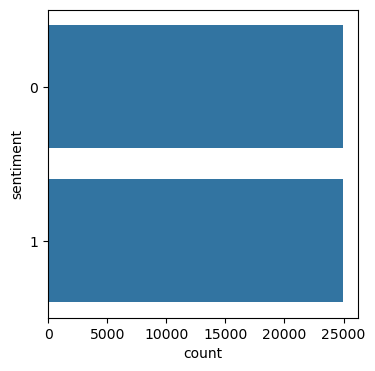

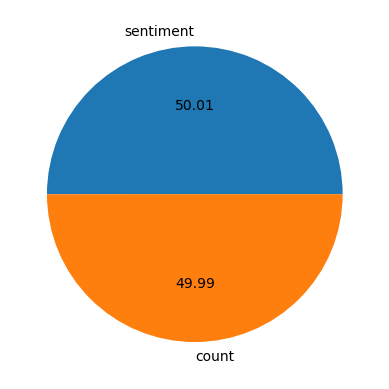

In [14]:
plt.figure (figsize=(4,4))
sns.countplot(y = 'sentiment', data = df)
plt.show()

plt.pie(df['sentiment'].value_counts(),labels=['sentiment','count'],autopct='%0.02f')
plt.show()

### Create a function to Preprocess the review column

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [17]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Print some text after applying the function

In [19]:
for i in range(10):
    print(df['review'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

### Split the dataset into Input (X) & Target (y) variable

In [21]:
x = df['review']
y = df['sentiment']

In [22]:
y

0        0
1        1
2        0
3        0
4        0
        ..
49964    0
49965    0
49966    0
49967    0
49968    1
Name: sentiment, Length: 49969, dtype: int64

### Convert y variable values into 0 and 1 from positive and negative

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
tokenizer = Tokenizer(num_words=5000)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [28]:
tokenizer.fit_on_texts(x_train)

In [29]:
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'be',
 27: 'one',
 28: 'he',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'so',
 35: 'who',
 36: 'from',
 37: 'like',
 38: 'or',
 39: 'just',
 40: 'her',
 41: 'out',
 42: 'about',
 43: 'if',
 44: "it's",
 45: 'has',
 46: 'there',
 47: 'some',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'my',
 57: 'even',
 58: 'would',
 59: 'she',
 60: 'which',
 61: 'only',
 62: 'really',
 63: 'see',
 64: 'story',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'me',
 69: 'were',
 70: 'well',
 71: 'we',
 72: 'much',
 73: 'than',
 74: 'bad',
 75: 'get',
 76: 'been',
 77: 'do',
 78: 'will',
 79: 'other',
 80: 'great',
 81: 'also',
 82: 'into',
 83

In [30]:
vocab_size = tokenizer.num_words+1

In [31]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)

    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)

    return padded_sequence

In [32]:
x_train = text_encoding(x_train)
x_test = text_encoding(x_test)

In [33]:
vocab_size

5001

### Split the dataset into Training & Testing set

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y

0        0
1        1
2        0
3        0
4        0
        ..
49964    0
49965    0
49966    0
49967    0
49968    1
Name: sentiment, Length: 49969, dtype: int64

### Create keras Sequential Model with LSTM Layers

In [38]:
from keras import Sequential
from keras import layers

In [39]:
print(f'shape of x_train : {(x_train.shape)}')
print(f'shape of x_test : {(x_test.shape)}')

shape of x_train : (39975, 128)
shape of x_test : (9994, 128)


In [40]:
vocab_size

5001

In [41]:
model = Sequential()
model.add(Embedding(vocab_size,128))
model.add(GRU(62))
model.add(Dense(128,activation='relu'))
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the model

### Train the model with our training set

In [45]:
vocab_size

5001

### Make prediction with X_test

In [47]:
model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=32,
         validation_data=[x_test,y_test])

Epoch 1/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.7121 - loss: 0.5271 - val_accuracy: 0.8514 - val_loss: 0.3504
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.8811 - loss: 0.2836 - val_accuracy: 0.8765 - val_loss: 0.2832
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9105 - loss: 0.2272 - val_accuracy: 0.8870 - val_loss: 0.2703
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.9221 - loss: 0.1972 - val_accuracy: 0.8782 - val_loss: 0.2977


In [48]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8757 - loss: 0.2983


[0.29769691824913025, 0.8782269358634949]

In [49]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [50]:
len(y_pred)

9994

In [51]:
len(y_test)

9994

### Convert to 0 and 1 with higher probability towards 1

In [69]:
y_pred= [0 if i<.5 else 1 for i in y_pred]

### Evaluate the model

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Check accuracy score

In [75]:
accuracy_score(y_test, y_pred)

0.878226936161697

### Check confusion matrix

<Axes: >

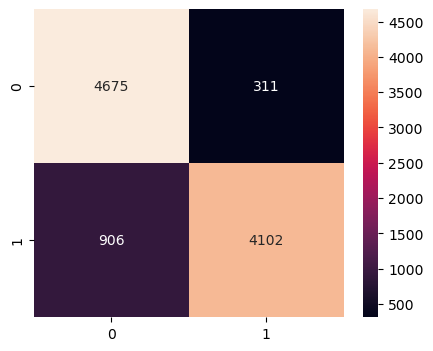

In [78]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')

### Print Classification report

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4986
           1       0.93      0.82      0.87      5008

    accuracy                           0.88      9994
   macro avg       0.88      0.88      0.88      9994
weighted avg       0.88      0.88      0.88      9994



***